In [ ]:
!if not exist "./files" mkdir files
# Download Face detection XML 
!curl -L -o ./files/haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   790    0   790    0     0   1083      0 --:--:-- --:--:-- --:--:--  1083
100 42539    0 42539    0     0  47924      0 --:--:-- --:--:-- --:--:-- 47958


In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from keras.models import load_model
model = load_model('VGG16_BatchNor.h5')

In [ ]:
import cv2
import numpy as np   
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# Face detection XML load and trained model loading
face_detection = cv2.CascadeClassifier('files/haarcascade_frontalface_default.xml')
emotion_classifier = load_model('VGG16_BatchNor.h5', compile=False)
EMOTIONS = ["Angry" , "Happy", "Neutral", "Sad"]

# Video capture using webcam
camera = cv2.VideoCapture(0)

while True:
    # Capture image from camera
    ret, frame = camera.read()
    
    # Convert color to gray scale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Face detection in frame
    faces = face_detection.detectMultiScale(frame,
                                            scaleFactor=1.1,
                                            minNeighbors=5,
                                            minSize=(30,30))
    
    # Create empty image
    canvas = np.zeros((250, 300, 3), dtype="uint8")
    
    # Perform emotion recognition only when face is detected
    if len(faces) > 0:
        # For the largest image
        face = sorted(faces, reverse=True, key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))[0]
        (fX, fY, fW, fH) = face
        # Resize the image to 48x48 for neural network
        roi = frame[fY:fY + fH, fX:fX + fW]
        roi = cv2.resize(roi, (250, 250))
        roi = roi.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        
        # Emotion predict
        preds = emotion_classifier.predict(roi)[0]
        emotion_probability = np.max(preds)
        label = EMOTIONS[preds.argmax()]
        
        # Assign labeling
        cv2.putText(frame, label, (fX, fY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
        cv2.rectangle(frame, (fX, fY), (fX + fW, fY + fH), (0, 0, 255), 2)
 
        # Label printing
        for (i, (emotion, prob)) in enumerate(zip(EMOTIONS, preds)):
            text = "{}: {:.2f}%".format(emotion, prob * 100)    
            w = int(prob * 300)
            cv2.rectangle(canvas, (7, (i * 35) + 5), (w, (i * 35) + 35), (0, 0, 255), -1)
            cv2.putText(canvas, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)

    # Open two windows
    ## Display image ("Emotion Recognition")
    ## Display probabilities of emotion
    cv2.imshow('Emotion Recognition', frame)
    cv2.imshow("Probabilities", canvas)
    
    # q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Clear program and close windows
camera.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

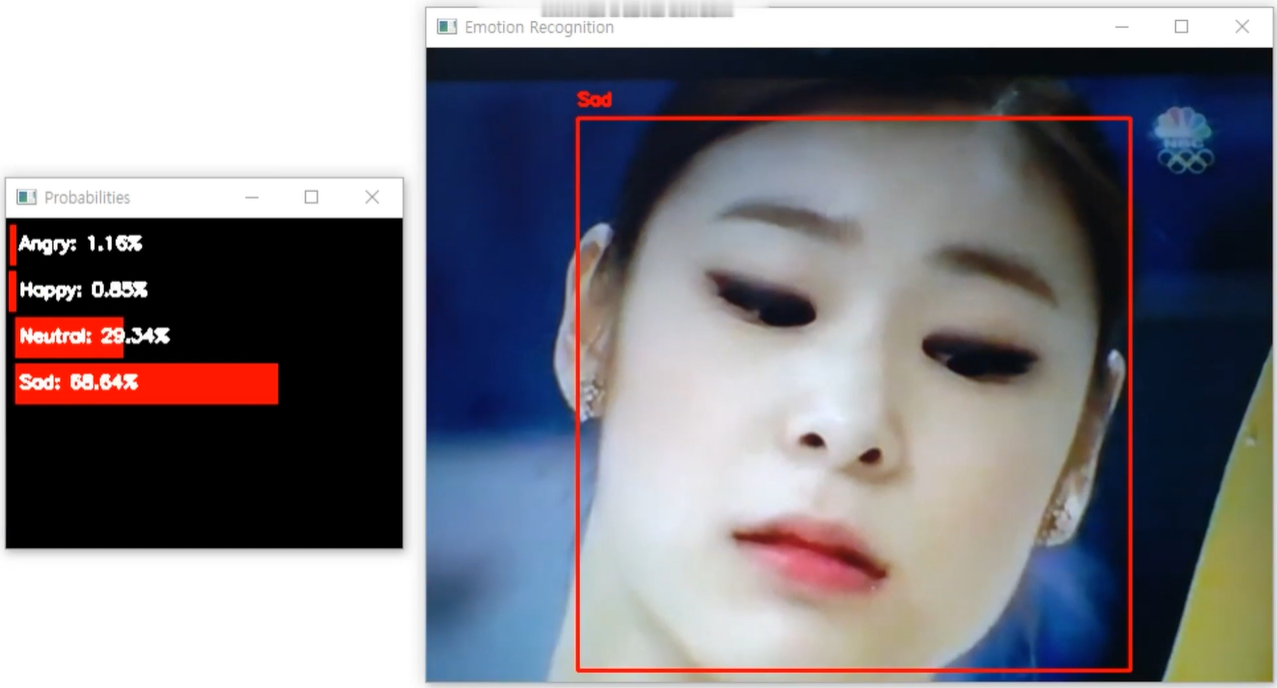